## Les membres du Groupe 

- #### <span style="color:blue">HURA Charly Bien Aimé Nansun</span>  
- #### <span style="color:blue"> LEKOULEDIA Moké Mardoché Modestelin </span>  

# PROJET FINAL: Analyse de données et machine learning avec Python

Il s'agit d'analyser les données collectées sur la pandémie du covid 19 qui sont dans un fichier au format csv (voir dossier *data*).

## Description du jeu du données:

### Contexte

La maladie à coronavirus (COVID-19) est une maladie infectieuse causée par un coronavirus récemment découvert. La plupart des personnes infectées par le virus COVID-19 souffriront d'une maladie respiratoire légère à modérée et se rétabliront sans nécessiter de traitement particulier. Les personnes âgées et celles qui présentent des problèmes médicaux sous-jacents tels que les maladies cardiovasculaires, le diabète, les maladies respiratoires chroniques et le cancer sont plus susceptibles de développer une maladie grave.

Pendant toute la durée de la pandémie, l'un des principaux problèmes auxquels les prestataires de soins de santé ont été confrontés est le manque de ressources médicales et d'un plan approprié pour les distribuer efficacement. En ces temps difficiles, être capable de prédire le type de ressources dont un individu pourrait avoir besoin au moment où il est testé positif ou même avant cela sera d'une aide immense pour les autorités car elles seront en mesure de se procurer et d'organiser les ressources nécessaires pour sauver la vie de ce patient.

L'objectif principal de ce projet est de construire un modèle d'apprentissage automatique qui, compte tenu des symptômes, de l'état et des antécédents médicaux d'un patient atteint du Covid-19, permettra de prédire si le patient est à haut risque ou non.

### Description du jeux de données

Le jeu de données a été fourni par le gouvernement mexicain. Cet ensemble de données contient un nombre énorme d'informations anonymes relatives aux patients, y compris les conditions préalables. L'ensemble de données brutes se compose de 21 caractéristiques uniques et de 1 048 576 patients uniques. Dans les caractéristiques booléennes, 1 signifie "oui" et 2 signifie "non". Les valeurs 97 et 99 indique des données manquantes.

Quelques informations sur les *features*:

- sex : femme ou homme
- age : du patient.
- classification : résultats du test covid. Les valeurs 1-3 signifient que le patient a été diagnostiqué avec un covid à différents degrés. 4 ou plus signifie que le patient n'est pas porteur du covid ou que le test n'est pas concluant.
- patient type: hospitalisé ou non hospitalisé.
- pneumonia : si le patient a déjà une inflammation lié à la pneumonie ou non.
- pregnancy : si la patiente est enceinte ou non.
- diabetes : indique si le patient est diabétique ou non.
- copd: indique si le patient est atteint ou non de bronchopneumopathie chronique obstructive.
- asthma : indique si le patient est asthmatique ou non.
- inmsupr : indique si le patient est immunodéprimé ou non.
- hypertension : si le patient est hypertendu ou non.
- cardiovascular : si le patient est atteint d'une maladie du cœur ou des vaisseaux sanguins.
- renal chronic : si le patient est atteint d'une maladie rénale chronique ou non.
- other disease : si le patient est atteint d'une autre maladie ou non.
- obesity : si le patient est obèse ou non.
- tobacco : si le patient est un fumeur.
- usmr : indique si le patient a traité des unités médicales de premier, deuxième ou troisième niveau.
- medical unit: type d'institution du système national de santé qui a dispensé les soins.
- intubed : indique si le patient a été relié au ventilateur.
- icu : indique si le patient a été admis dans une unité de soins intensifs.


# Étape 1 : Préparation et nettoyage des données
1. Chargez le jeu de données  dans un *dataframe* à l'aide de Pandas.
2. Explorez le nombre de lignes et de colonnes, les plages de valeurs, etc.
3. Traitez les données manquantes, incorrectes et invalides
4. Effectuez toute étape supplémentaire (analyse des dates, création de colonnes supplémentaires, fusion de plusieurs ensembles de données, etc.)

### Importation de tous les modules nécessaires pour le projet

In [1]:
# Chargement de tous les parckages nécessaires pour le projet
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import pickle
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score
from sklearn.model_selection import cross_val_score


### 1. Chargez le jeu de données dans un dataframe à l'aide de Pandas.

In [3]:
# Le chemin vers le fichier CSV covid19
file_path = r"C:\Users\HP\OneDrive - ENSEA\FORMATION\DATA ANALYST INDUSTRIEL INPHB\COURS\PYTHON POUR AD\ProjectFinal2024-2025\covid19_data_copie.csv"

# Charger le jeu de données
covid19_df = pd.read_csv(file_path) 

# Affichage des 100 premiers lignes pour vérifier le contenu
covid19_df.head(100)

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2,1,1,1,9999-99-99,97,2,49,2,2,...,2,2,2,2,2,2,2,2,7,97
96,2,1,1,1,9999-99-99,97,2,24,2,2,...,2,2,2,2,2,2,2,2,7,97
97,2,1,2,1,9999-99-99,97,2,28,97,2,...,2,2,2,2,2,2,2,2,7,97
98,2,1,2,1,9999-99-99,97,2,27,97,2,...,2,2,2,2,2,2,2,1,7,97


### 2. Explorez le nombre de lignes et de colonnes, les plages de valeurs, etc.

In [5]:
# Afficher les informations générales sur la base (types de colonnes, valeurs nulles, etc.)
print(covid19_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   USMER                 1048575 non-null  int64 
 1   MEDICAL_UNIT          1048575 non-null  int64 
 2   SEX                   1048575 non-null  int64 
 3   PATIENT_TYPE          1048575 non-null  int64 
 4   DATE_DIED             1048575 non-null  object
 5   INTUBED               1048575 non-null  int64 
 6   PNEUMONIA             1048575 non-null  int64 
 7   AGE                   1048575 non-null  int64 
 8   PREGNANT              1048575 non-null  int64 
 9   DIABETES              1048575 non-null  int64 
 10  COPD                  1048575 non-null  int64 
 11  ASTHMA                1048575 non-null  int64 
 12  INMSUPR               1048575 non-null  int64 
 13  HIPERTENSION          1048575 non-null  int64 
 14  OTHER_DISEASE         1048575 non-null  int64 
 15

### 3. Traitez les données manquantes, incorrectes et invalides

In [9]:
# Compter les valeurs manquantes (NaN)
print("Valeurs manquantes par colonne :")
print(covid19_df.isnull().sum())

Valeurs manquantes par colonne :
USMER                   0
MEDICAL_UNIT            0
SEX                     0
PATIENT_TYPE            0
DATE_DIED               0
INTUBED                 0
PNEUMONIA               0
AGE                     0
PREGNANT                0
DIABETES                0
COPD                    0
ASTHMA                  0
INMSUPR                 0
HIPERTENSION            0
OTHER_DISEASE           0
CARDIOVASCULAR          0
OBESITY                 0
RENAL_CHRONIC           0
TOBACCO                 0
CLASIFFICATION_FINAL    0
ICU                     0
dtype: int64


- 3.1 Identifications des variables contenant des valeurs invalides et manquentes

In [11]:
# Identifications les valeurs spécifiques à traiter (97 et 99)
valeurs_specifiques = [97,99]

for col in covid19_df.columns:
    print(f"Variable {col} : valeurs spéciales {valeurs_specifiques}")
    
    # Obtenir les valeurs et vérifiez leur présence
    value_counts = covid19_df[col].value_counts()
    for valeur in valeurs_specifiques:
        if valeur in value_counts.index:
            print(f" - {valeur}: {value_counts[valeur]} occurrences")
        else:
            print(f" - {valeur}: 0 occurrences")

Variable USMER : valeurs spéciales [97, 99]
 - 97: 0 occurrences
 - 99: 0 occurrences
Variable MEDICAL_UNIT : valeurs spéciales [97, 99]
 - 97: 0 occurrences
 - 99: 0 occurrences
Variable SEX : valeurs spéciales [97, 99]
 - 97: 0 occurrences
 - 99: 0 occurrences
Variable PATIENT_TYPE : valeurs spéciales [97, 99]
 - 97: 0 occurrences
 - 99: 0 occurrences
Variable DATE_DIED : valeurs spéciales [97, 99]
 - 97: 0 occurrences
 - 99: 0 occurrences
Variable INTUBED : valeurs spéciales [97, 99]
 - 97: 848544 occurrences
 - 99: 7325 occurrences
Variable PNEUMONIA : valeurs spéciales [97, 99]
 - 97: 0 occurrences
 - 99: 16003 occurrences
Variable AGE : valeurs spéciales [97, 99]
 - 97: 135 occurrences
 - 99: 86 occurrences
Variable PREGNANT : valeurs spéciales [97, 99]
 - 97: 523511 occurrences
 - 99: 0 occurrences
Variable DIABETES : valeurs spéciales [97, 99]
 - 97: 0 occurrences
 - 99: 0 occurrences
Variable COPD : valeurs spéciales [97, 99]
 - 97: 0 occurrences
 - 99: 0 occurrences
Variable 

   - 3.2 Traitement de la variable DATE_DIED

In [111]:
# Création d'une autre variable IS_DEAD pour savoir si la personne est morte ou pas 
covid19_df['DEATH'] = (covid19_df['DATE_DIED'] != '9999-99-99').astype(int) # On a considéré les '9999-99-99' comme étant toujours vivants

# Vérifier les corrections
print(covid19_df[['DATE_DIED', 'DEATH']].head(10)) # 0 = Vivant et 1 = mort

    DATE_DIED  DEATH
0  03/05/2020      1
1  03/06/2020      1
2  09/06/2020      1
3  12/06/2020      1
4  21/06/2020      1
5  9999-99-99      0
6  9999-99-99      0
7  9999-99-99      0
8  9999-99-99      0
9  9999-99-99      0


   - 3.3 Traitement de la variable PREGNANT

In [13]:
# Croisement de la variable SEX et PREGNANT 
tab1 = pd.crosstab(covid19_df['SEX'], covid19_df['PREGNANT'])
print(tab1)

PREGNANT    1       2       97    98
SEX                                 
1         8131  513179       0  3754
2            0       0  523511     0


In [15]:
# Étape 1 : Identifier les incohérences et corriger la variable PREGNANT
# Si SEX == 2 (hommes), définir automatiquement PREGNANT à 2 (pas enceinte)
covid19_df.loc[covid19_df['SEX'] == 2, 'PREGNANT'] = 2

# Étape 2 : Remplacer les valeurs spécifiques (97, 98) par une valeur appropriée pour les femmes
# Valeurs manquantes remplacées par "2" (pas enceinte)
covid19_df.loc[(covid19_df['PREGNANT'].isin([97, 98])) & (covid19_df['SEX'] == 1), 'PREGNANT'] = 2

# Étape 3 : Vérifier les changements
print("Distribution de la variable PREGNANT après correction :")
tab2 = pd.crosstab(covid19_df['SEX'], covid19_df['PREGNANT'])
print(tab2)

Distribution de la variable PREGNANT après correction :
PREGNANT     1       2
SEX                   
1         8131  516933
2            0  523511


 - 3.4 Traitement de la variable AGE

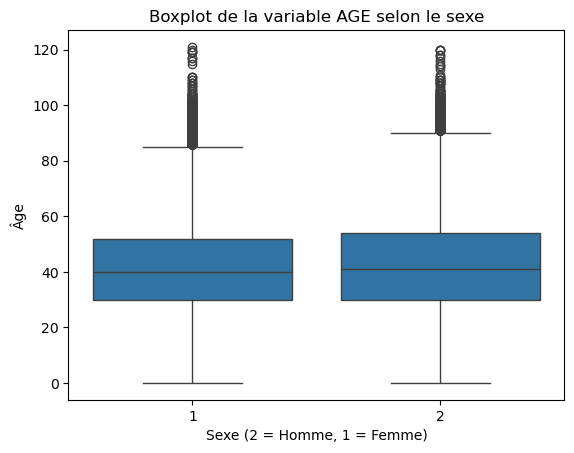

In [17]:
# Boxplot de la variable AGE selon le sexe
sns.boxplot(x='SEX', y='AGE', data=covid19_df)
plt.title('Boxplot de la variable AGE selon le sexe')
plt.xlabel('Sexe (2 = Homme, 1 = Femme)')
plt.ylabel('Âge')
plt.show()

In [19]:
# Remplacer les valeurs invalides de AGE par la médiane selon le sexe
valeurs_invalides = [97, 99] # Valeurs manquantes
covid19_df['AGE'] = covid19_df['AGE'].replace(valeurs_invalides, np.nan) # Remplacement des Valeurs manquantes par nan pour facilité l'imputation
covid19_df['AGE'] = covid19_df.groupby('SEX')['AGE'].transform(lambda x: x.fillna(x.median()))# Calcul de la médiane selon le sexe et imputation

 - 3.5 Traitement des autres variables, INTUBED , ICU et PNEUMONIA : Imputation par hot-deck
 
    Cette méthode remplace les valeurs manquantes par celles d'une observation similaire (déterminée par des variables clés)
        
   **Avantages de la méthode :**

   - Maintient la distribution des données.
   - Prend en compte des caractéristiques similaires (SEXE, AGE etc...) pour une imputation plus réaliste.

In [37]:
# Étape 1 : Identifier les variables à corriger et les valeurs invalides
variables_a_corriger = ['INTUBED', 'ICU', 'PNEUMONIA']
valeurs_invalides = [97, 99]

# Remplacer les valeurs invalides par NaN pour facilité l'imputation après
covid19_df[variables_a_corriger] = covid19_df[variables_a_corriger].replace(valeurs_invalides, np.nan)

# Fonction pour l'imputation par méthode hot-deck
def hot_deck_imputation(df, variable, group_vars):
    for group_values, group in df.groupby(group_vars):
        # Identifiez les indices des valeurs manquantes pour ce groupe
        missing = group[variable].isna()
        if missing.any():
            # Échantillonner les valeurs disponibles dans ce groupe
            sample_values = group[variable].dropna()
            if not sample_values.empty:
                # Générer autant de valeurs échantillonnées qu'il y a de valeurs manquantes
                imputed_values = sample_values.sample(
                    n=missing.sum(), replace=True, random_state=42
                ).values
                # Remplacer les valeurs manquantes dans la base globale
                df.loc[missing[missing].index, variable] = imputed_values

# Étape 2 : Application de la méthode Hot-Deck Imputation
group_vars = ['SEX', 'AGE']  # Grouper par sexe et âge pour trouver des observations similaires

for var in variables_a_corriger:
    hot_deck_imputation(covid19_df, var, group_vars)

# Étape 3 : Remplacer les valeurs restantes
covid19_df[variables_a_corriger] = covid19_df[variables_a_corriger].fillna(2)

# Convertir les colonnes corrigées en type entier
covid19_df[variables_a_corriger] = covid19_df[variables_a_corriger].astype('int')

# Étape 4 : Vérification des résultats
def print_modalities(df, variables):
    for var in variables:
        print(f"Variable {var} :")
        print(df[var].value_counts())

print_modalities(covid19_df, variables_a_corriger)


Variable INTUBED :
INTUBED
2    906053
1    142522
Name: count, dtype: int64
Variable ICU :
ICU
2    963987
1     84588
Name: count, dtype: int64
Variable PNEUMONIA :
PNEUMONIA
2    906601
1    141974
Name: count, dtype: int64


- 3.6 Vérification de la correction de toutes les variables concernées par l'imputation

In [39]:

# Identifications les valeurs spécifiques à traiter (97 et 99)
valeurs_specifiques = [97,99]

for col in covid19_df.columns:
    print(f"Variable {col} : valeurs spéciales {valeurs_specifiques}")
    
    # Obtenir les valeurs et vérifiez leur présence
    value_counts = covid19_df[col].value_counts()
    for valeur in valeurs_specifiques:
        if valeur in value_counts.index:
            print(f" - {valeur}: {value_counts[valeur]} occurrences")
        else:
            print(f" - {valeur}: 0 occurrences")

Variable USMER : valeurs spéciales [97, 99]
 - 97: 0 occurrences
 - 99: 0 occurrences
Variable MEDICAL_UNIT : valeurs spéciales [97, 99]
 - 97: 0 occurrences
 - 99: 0 occurrences
Variable SEX : valeurs spéciales [97, 99]
 - 97: 0 occurrences
 - 99: 0 occurrences
Variable PATIENT_TYPE : valeurs spéciales [97, 99]
 - 97: 0 occurrences
 - 99: 0 occurrences
Variable DATE_DIED : valeurs spéciales [97, 99]
 - 97: 0 occurrences
 - 99: 0 occurrences
Variable INTUBED : valeurs spéciales [97, 99]
 - 97: 0 occurrences
 - 99: 0 occurrences
Variable PNEUMONIA : valeurs spéciales [97, 99]
 - 97: 0 occurrences
 - 99: 0 occurrences
Variable AGE : valeurs spéciales [97, 99]
 - 97: 0 occurrences
 - 99: 0 occurrences
Variable PREGNANT : valeurs spéciales [97, 99]
 - 97: 0 occurrences
 - 99: 0 occurrences
Variable DIABETES : valeurs spéciales [97, 99]
 - 97: 0 occurrences
 - 99: 0 occurrences
Variable COPD : valeurs spéciales [97, 99]
 - 97: 0 occurrences
 - 99: 0 occurrences
Variable ASTHMA : valeurs spé

# Etape 2:  Effectuer une analyse exploratoire et une visualisation
1. Calculez la moyenne, la somme, l'étendue et d'autres statistiques intéressantes pour les colonnes numériques.
2. Explorez les distributions des colonnes numériques à l'aide d'histogrammes, etc.
3. Explorez les relations entre les colonnes à l'aide d'une matrice des corrélations entre les *features* (voir visualisation avec heatmap)
4. Notez les résultats intéressants de l'analyse exploratoire.


 ### 1. Calculez la moyenne, la somme, l'étendue et d'autres statistiques intéressantes pour les colonnes numériques.

In [121]:
# Calcul des statistiques descriptives
def calculer_statistiques(df):
    stats = df.describe().T  # Tableau des statistiques de base
    stats['range'] = df.max() - df.min()  # Étendue
    stats['var'] = df.var()  # Variance
    stats['skew'] = df.skew()  # Asymétrie
    stats['kurtosis'] = df.kurtosis()  # Kurtosis (aplatissement de la distribution)
    return stats

# Filtrer les colonnes spécifiques
colonnes_selectionnees = ['AGE', 'CLASIFFICATION_FINAL', 'MEDICAL_UNIT']
colonnes_numeriques = covid19_df[colonnes_selectionnees].select_dtypes(include=['number'])

# Appliquer les statistiques descriptives sur les colonnes sélectionnées
statistiques = calculer_statistiques(colonnes_numeriques)

# Arrondi à deux chiffres après la virgule
statistiques_arrondies = statistiques.round(2)

# Affichage des résultats
statistiques_arrondies


,count,mean,std,min,25%,50%,75%,max,range,var,skew,kurtosis
AGE,1048575.0,41.78,16.89,0.0,30.0,40.0,53.0,121.0,121.0,285.20,0.28,0.05
CLASIFFICATION_FINAL,1048575.0,5.31,1.88,1.0,3.0,6.0,7.0,7.0,6.0,3.54,-0.42,-1.62
MEDICAL_UNIT,1048575.0,8.98,3.72,1.0,4.0,12.0,12.0,13.0,12.0,13.86,-0.52,-1.64


### 2. Explorez les distributions des colonnes numériques à l'aide d'histogrammes, etc.

- 2.1 Exploration des distributions des variables SEXE et IS_DEAD

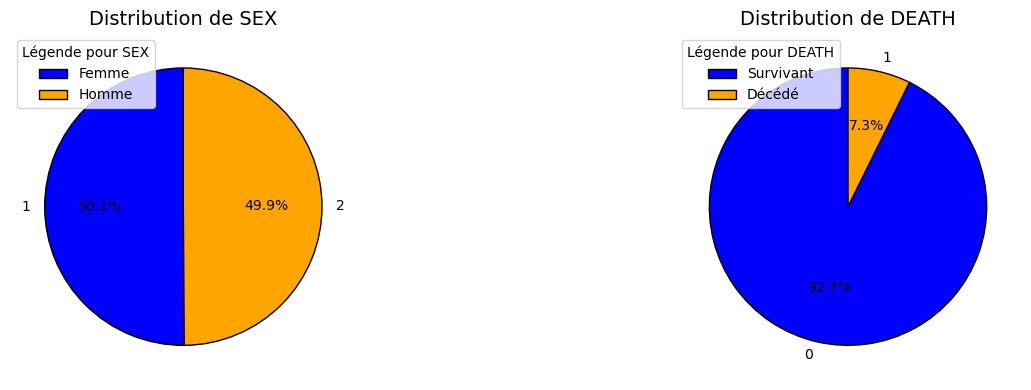

In [43]:
# Définition les couleurs pour les secteurs du graphique
colors = ['blue', 'orange']

# Liste des variables à analyser
variables = ['SEX', 'DEATH']

# Nombre de graphiques par ligne et par colonne
n_cols = 2  # 2 graphiques par ligne
n_rows = 1  # 1 ligne de graphique

# Création de figure avec plusieurs sous-graphiques
fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 4))  # Taille réduite de la figure

# Aplatissement des axes pour faciliter l'indexation
axes = axes.flatten()

# Itération sur les variables pour créer les graphiques circulaires
for i, var in enumerate(variables):
    # Calcul des proportions pour chaque variable
    proportions = covid19_df[var].value_counts(normalize=True) * 100  # Proportions en pourcentage
    proportions = proportions.round(1)  # Arrondi à 1 chiffre après la virgule
    
    # Création le graphique circulaire
    wedges, texts, autotexts = axes[i].pie(
        proportions, 
        labels=proportions.index, 
        autopct='%1.1f%%', 
        colors=colors, 
        startangle=90, 
        wedgeprops={'edgecolor': 'black'}
    )
    
    # Ajout de légende
    axes[i].legend(
        wedges, 
        ['Femme' if var == 'SEX' and idx == 1 else 'Homme' if var == 'SEX' and idx == 2 else 'Survivant' if var == 'DEATH' and idx == 0 else 'Décédé' 
         for idx in proportions.index], 
        title=f"Légende pour {var}", 
        loc='upper left'
    )
    
    # Personnalisation des graphiques
    axes[i].set_title(f"Distribution de {var}", fontsize=14)

# Ajustement de l'espace entre les sous-graphiques
plt.tight_layout()
plt.show()

- 2.2 Exploration des distributions des variables CARDIOVASCULAR , DIABETES , COPD ,INMSUPR ,HIPERTENSION ,OBESITY, RENAL_CHRONIC

In [45]:
# Liste des variables à analyser
variables = ['CARDIOVASCULAR', 'DIABETES', 'COPD', 'INMSUPR', 'HIPERTENSION', 'OBESITY', 'RENAL_CHRONIC']

# Calcul de la proportion de "oui" pour chaque variable
for var in variables:
    taux_oui = (covid19_df[var] == 1).mean() * 100 # Multipliée par 100 pour obtenir un pourcentage
    print(f"Taux de 'oui' pour la variable {var} : {taux_oui:.2f}%")


Taux de 'oui' pour la variable CARDIOVASCULAR : 1.98%
Taux de 'oui' pour la variable DIABETES : 11.92%
Taux de 'oui' pour la variable COPD : 1.44%
Taux de 'oui' pour la variable INMSUPR : 1.35%
Taux de 'oui' pour la variable HIPERTENSION : 15.52%
Taux de 'oui' pour la variable OBESITY : 15.24%
Taux de 'oui' pour la variable RENAL_CHRONIC : 1.80%


- 2.3 Exploration des distributions des variables INTUBED, ICU, PNEUMONIA, USMER, PATIENT_TYPE, ICU

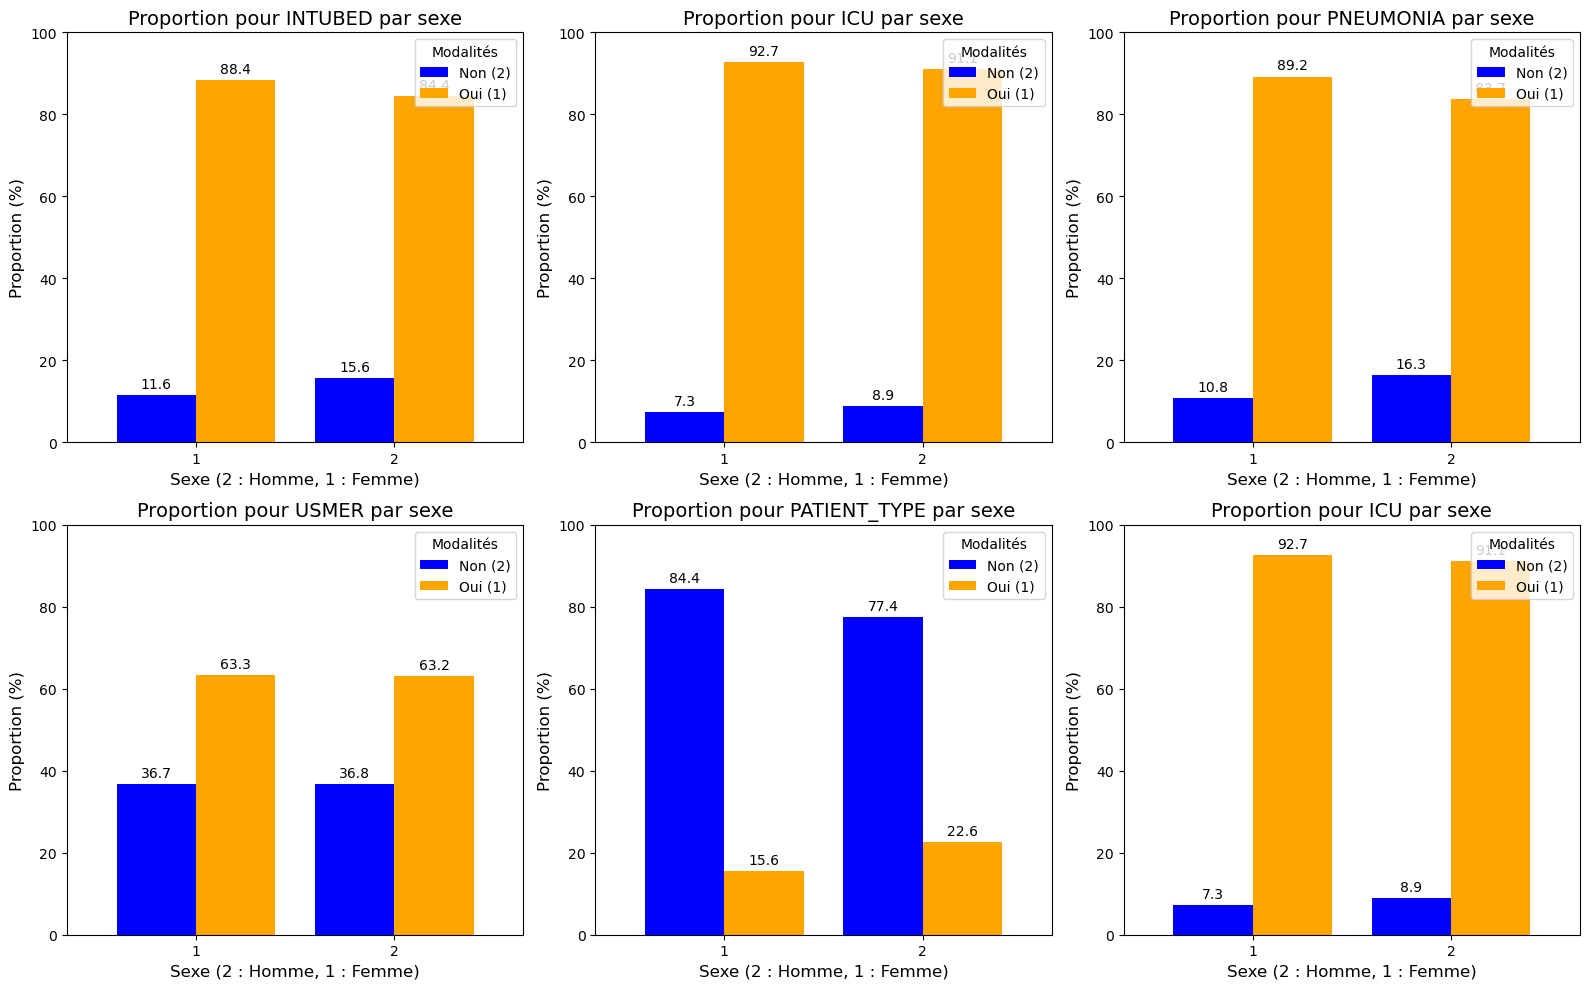

In [47]:
# Définir les couleurs orange et bleu
colors = ['blue', 'orange']

# Liste des variables à analyser
variables = ['INTUBED', 'ICU', 'PNEUMONIA', 'USMER', 'PATIENT_TYPE', 'ICU']

# Création de figure avec plusieurs sous-graphiques
n_rows, n_cols = 2, 3  # Configuration de la grille (2 lignes, 3 colonnes)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 10))  # Taille de la figure

# Aplatissement les axes pour une indexation facile
axes = axes.flatten()

# Itération sur les variables pour créer les graphiques
for i, var in enumerate(variables):
    # Calcul des proportions pour chaque variable
    proportions = pd.crosstab(covid19_df['SEX'], covid19_df[var], normalize='index') * 100
    proportions = proportions.round(1)  # Arrondi à 1 chiffre après la virgule
    
    # Créer un graphique à barres pour chaque variable
    proportions.plot(
        kind='bar', 
        color=colors, 
        ax=axes[i], 
        width=0.8
    )
    
    # Ajout les valeurs sur les barres
    for bar_group in axes[i].containers:
        for bar in bar_group:
            height = bar.get_height()
            if height > 0:  # Ajout uniquement si la hauteur est significative
                axes[i].annotate(f'{height:.1f}',  # Valeur formatée avec 1 chiffre après la virgule
                                 xy=(bar.get_x() + bar.get_width() / 2, height),
                                 xytext=(0, 3),  # Décalage vertical de 3 unités
                                 textcoords="offset points",
                                 ha='center', va='bottom', fontsize=10)

    # Personnalisation des graphiques
    axes[i].set_title(f"Proportion pour {var} par sexe", fontsize=14)
    axes[i].set_xlabel("Sexe (2 : Homme, 1 : Femme)", fontsize=12)
    axes[i].set_ylabel("Proportion (%)", fontsize=12)
    axes[i].legend(title="Modalités", labels=["Non (2)", "Oui (1)"], loc='upper right')
    axes[i].set_ylim(0, 100)  # Limiter l'axe Y à 100%
    axes[i].tick_params(axis='x', rotation=0)

# Suppression des sous-graphiques vides (si la grille dépasse le nombre de variables)
for j in range(len(variables), len(axes)):
    fig.delaxes(axes[j])

# Ajustement de l'espace entre les sous-graphiques
plt.tight_layout()
plt.show()

### 3 . Explorez les relations entre les colonnes à l'aide d'une matrice des corrélations entre les features (voir visualisation avec heatmap)

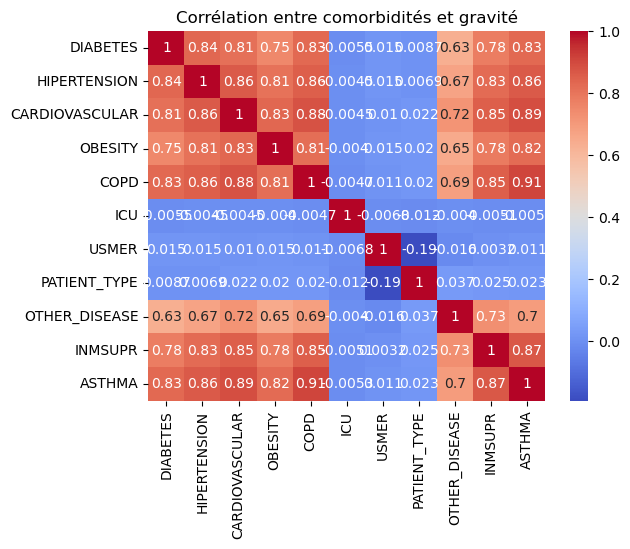

In [49]:
# Heatmap de corrélation
# Liste des variables d'intérêt liées aux comorbidités et à la gravité
variables = ['DIABETES', 'HIPERTENSION', 'CARDIOVASCULAR', 'OBESITY', 'COPD', 'ICU', 'USMER', 'PATIENT_TYPE', 'OTHER_DISEASE', 'INMSUPR','ASTHMA']

# Calcul de la matrice de corrélation
# `corr()` calcule les coefficients de corrélation de Pearson entre toutes les paires de variables sélectionnées.
corr_matrix = covid19_df[variables].corr()

# Visualisation de la matrice de corrélation avec une heatmap
# `heatmap` crée une carte thermique basée sur la matrice de corrélation.
# `annot=True` affiche les valeurs numériques des corrélations sur la heatmap.
# `cmap='coolwarm'` définit une palette de couleurs allant du bleu (corrélations négatives) au rouge (corrélations positives).
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Corrélation entre comorbidités et gravité")  # Titre du graphique
plt.show()  # Affiche la heatmap


### 4. Notez les résultats intéressants de l'analyse exploratoire.


- **La répartition entre hommes et femmes**  est presque équivalente, avec une légère majorité de femmes (50,1%).
- **La grande majorité des individus**  sont des survivants (92,7%), tandis que seuls 7,3% sont décédés. On note une faible proportion de décès par rapport aux survivants. 

- **Les comorbidités les plus courantes**  dans cet ensemble de données sont : L’hypertension (15.52 %), L’obésité (15.24 %), Le diabète (11.92 %).
- **Les autres comorbidités**  (maladies cardiovasculaires, immunosuppression, maladie rénale chronique) sont nettement moins fréquentes (1-2 %). Ces informations peuvent guider l’analyse pour se concentrer sur les comorbidités les plus significatives et leur impact sur les issues graves du Covid-19.


- **Admission en soins intensifs (ICU):**  Les hommes (Sexe = 2) sont admis en soins intensifs dans 7.3 % des cas, contre 8.9 % chez les femmes. Les femmes semblent légèrement plus susceptibles d’être admises en soins intensifs
- **Pneumonie (PNEUMONIA):**  Les hommes (Sexe = 2) développent une pneumonie dans 10.8 % des cas, contre 16.3 % pour les femmes. Les femmes semblent plus à risque de développer une pneumonie.

- **Type d'unité médicale (USMER):**  Les proportions de patients traités dans des unités médicales spécialisées (USMER) sont similaires pour les hommes (36.7 %) et les femmes (36.8 %). Cela montre que le sexe n’a pas d’impact significatif sur l’accès à ces types d’unités médicales.

- **Type de patient (hospitalisé ou non - PATIENT_TYPE):** Les hommes (Sexe = 2) sont hospitalisés dans 15.6 % des cas, contre 22.6 % pour les femmes. Les femmes sont plus souvent hospitalisées, ce qui pourrait être lié à un taux plus élevé de complications ou de comorbidités.

- **Le heatmap**  Confirme que certaines comorbidités (comme DIABETES, HIPERTENSION, et OBESITY) coexistent souvent et augmentent les chances d'hospitalisation ou de gravité. Cependant, l'admission en soins intensifs (ICU) semble être influencée par plusieurs facteurs combinés, car les corrélations individuelles avec les comorbidités sont modérées.

#### Synthèse générale
Les graphiques montrent que, dans plusieurs catégories importantes (admission en soins intensifs, pneumonie, hospitalisation), les femmes présentent des proportions légèrement plus élevées que les hommes. Cela peut refléter des différences biologiques ou des biais dans les diagnostics/trajets de soins.

# Etape 3: Posez des questions sur les données et répondez-y.
1. Posez au moins 4 questions intéressantes sur votre ensemble de données.
2. Répondez aux questions soit en calculant les résultats à l'aide de Numpy/Pandas, soit en traçant des graphiques à l'aide de Matplotlib/Seaborn.
3. Créez de nouvelles colonnes, fusionnez plusieurs ensembles de données et effectuez des regroupements/agrégations si nécessaire.
4. Chaque fois que vous utilisez une fonction de bibliothèque de Pandas/Numpy/Matplotlib, etc., expliquez brièvement ce qu'elle fait.

### 1. Posez au moins 4 questions intéressantes sur votre ensemble de données

- 1.1 Quel est le pourcentage de patients ayant une certaine comorbidité spécifique parmi l'ensemble des cas confirmés de Covid-19 ?

In [51]:
# Calculer et afficher le pourcentage de patients atteints de chaque condition
conditions = ['DIABETES', 'PNEUMONIA', 'INMSUPR', 'HIPERTENSION', 'CARDIOVASCULAR', 'RENAL_CHRONIC']

for condition in conditions:
    # Calcul du pourcentage pour chaque condition (valeurs égales à 1)
    taux_condition = (covid19_df[condition] == 1).mean() * 100
    print(f"Pourcentage de patients atteints de {condition} : {taux_condition:.2f}%")


Pourcentage de patients atteints de DIABETES : 11.92%
Pourcentage de patients atteints de PNEUMONIA : 13.54%
Pourcentage de patients atteints de INMSUPR : 1.35%
Pourcentage de patients atteints de HIPERTENSION : 15.52%
Pourcentage de patients atteints de CARDIOVASCULAR : 1.98%
Pourcentage de patients atteints de RENAL_CHRONIC : 1.80%


- 1.2 Quel est l'âge moyen des patients atteints de Covid-19 en fonction du dégré du test ?

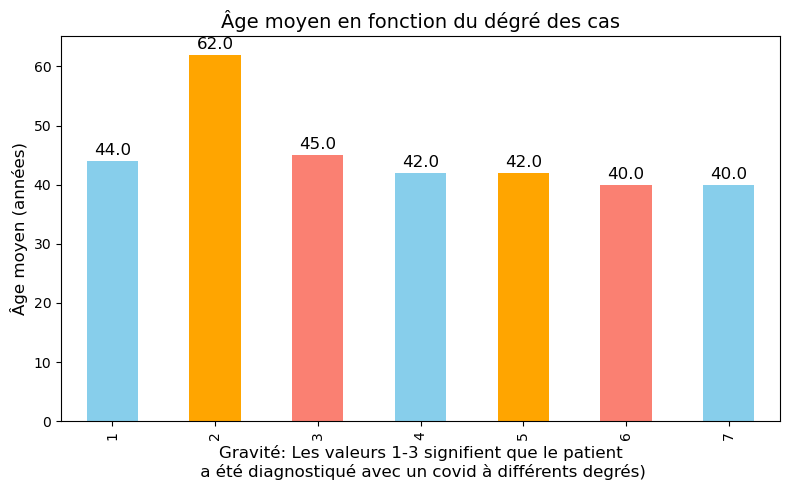

In [53]:
# 1. Calcul de l'âge moyen par gravité
# On groupe les données par la colonne 'CLASIFFICATION_FINAL' (gravité des cas)
# Ensuite, on calcule la moyenne des âges pour chaque groupe et on arrondit à l'entier
age_moyen_par_degre = covid19_df.groupby('CLASIFFICATION_FINAL')['AGE'].mean().round(0)

# 2. Affichage des résultats sous forme graphique
# La fonction plt.figure crée une nouvelle figure avec une taille personnalisée (8x6 pouces ici)
plt.figure(figsize=(8, 5))

# La fonction plot() trace un graphique à barres (type='bar') avec les données calculées
# Les couleurs des barres sont spécifiées par une liste : ['skyblue', 'orange', 'salmon']
age_moyen_par_degre.plot(kind='bar', color=['skyblue', 'orange', 'salmon'])

# 3. Ajouter des titres et des étiquettes
# plt.title définit le titre du graphique, avec une taille de police de 14
plt.title("Âge moyen en fonction du dégré des cas", fontsize=14)

# plt.xlabel ajoute une étiquette à l'axe des abscisses, ici pour indiquer les catégories de gravité
plt.xlabel("Gravité: Les valeurs 1-3 signifient que le patient\n a été diagnostiqué avec un covid à différents degrés)", fontsize=12)

# plt.ylabel ajoute une étiquette à l'axe des ordonnées pour indiquer l'unité de l'axe (l'âge moyen)
plt.ylabel("Âge moyen (années)", fontsize=12)

# 4. Afficher les valeurs sur les barres
# La boucle for permet de parcourir les valeurs d'âge moyen et les afficher au-dessus de chaque barre
for i, value in enumerate(age_moyen_par_degre):
    # plt.text place le texte à la position (i, value+1), où i est l'indice de la barre et value+1 place le texte au-dessus de la barre
    # 'ha' est l'alignement horizontal du texte, 'center' aligne le texte au centre de la barre
    # fontsize=12 définit la taille de la police du texte
    plt.text(i, value + 1, f'{value}', ha='center', fontsize=12)

# 5. Ajuster l'espacement automatique pour éviter que les éléments ne se chevauchent
plt.tight_layout()

# 6. Afficher le graphique
plt.show()


- 1.4 Comment la répartition des cas de Covid-19 varie-t-elle en fonction du sexe des patients (hommes vs femmes) ?

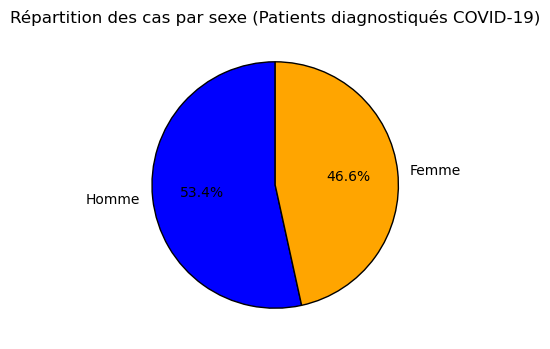

In [55]:
# 1. Filtrer les patients diagnostiqués avec COVID-19 (1-3 dans CLASIFFICATION_FINAL)
covid_diagnosed = covid19_df[covid19_df['CLASIFFICATION_FINAL'].between(1, 3)]

# 2. Calcul du nombre et pourcentage de cas par sexe pour les patients diagnostiqués
cas_par_sexe = covid_diagnosed['SEX'].value_counts(normalize=True) * 100

# 3. Visualisation avec un camembert (pie chart)
# Définir les étiquettes (1 = Femme, 2 = Homme)
labels = ['Homme', 'Femme']

# Définir les couleurs pour chaque segment du camembert
colors = ['blue', 'orange']

# Tracer le graphique en camembert
plt.figure(figsize=(4, 4))
plt.pie(cas_par_sexe, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90, wedgeprops={'edgecolor': 'black'})

# Ajouter un titre
plt.title("Répartition des cas par sexe (Patients diagnostiqués COVID-19)")

# Afficher le graphique
plt.show()


- 1.5 Quels sont les taux d’hospitalisation et de séjour en soins intensifs parmi les cas positifs au Covid-19 ?

In [57]:
# Filtrer uniquement les cas positifs au Covid-19
# Les valeurs 1, 2 et 3 de la variable 'CLASSIFICATION' indiquent des cas positifs
cas_positifs = covid19_df[covid19_df['CLASIFFICATION_FINAL'].isin([1, 2, 3])]

# Calcul du taux d'hospitalisation parmi les cas positifs
taux_hospitalisation = (cas_positifs['PATIENT_TYPE'] == 1).mean() * 100

# Calcul du taux de séjour en soins intensifs parmi les cas positifs
taux_icu = (cas_positifs['ICU'] == 1).mean() * 100

# Affichage des résultats
print(f"Taux d'hospitalisation parmi les cas positifs : {taux_hospitalisation:.2f} %")
print(f"Taux de séjour en soins intensifs parmi les cas positifs : {taux_icu:.2f} %")


Taux d'hospitalisation parmi les cas positifs : 71.61 %
Taux de séjour en soins intensifs parmi les cas positifs : 8.39 %


- 1.6 Y a-t-il une différence d’âge significative entre les patients hospitalisés et non hospitalisés ?

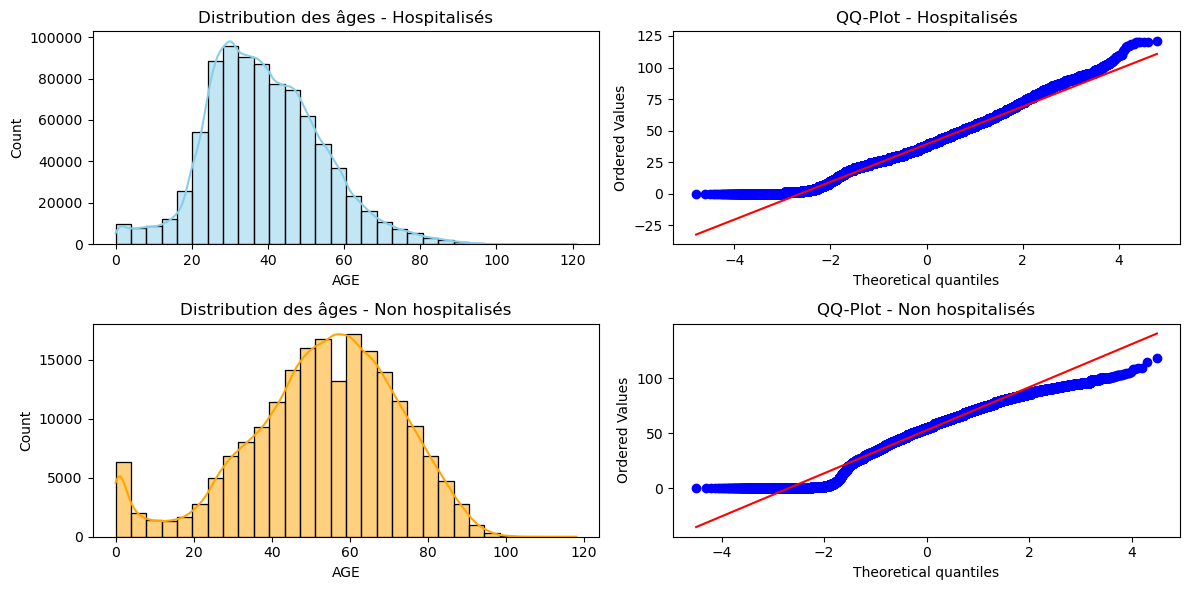

Test de Kolmogorov-Smirnov pour les hospitalisés : p-value = 0.0
Test de Kolmogorov-Smirnov pour les non-hospitalisés : p-value = 0.0
Test de Mann-Whitney : p-value = 0.0
Conclusion : Il y a une différence significative d'âge entre les hospitalisés et les non-hospitalisés.


In [59]:
# 1. Filtrer les patients hospitalisés et non hospitalisés
# On filtre les patients en fonction de la variable 'PATIENT_TYPE' (1 = hospitalisés, 2 = non hospitalisés).
hospitalises = covid19_df[covid19_df['PATIENT_TYPE'] == 1]['AGE']  # Âges des patients hospitalisés
non_hospitalises = covid19_df[covid19_df['PATIENT_TYPE'] == 2]['AGE']  # Âges des patients non hospitalisés
#
# 2. Visualiser la normalité avec des graphiques
# On crée une figure contenant 4 sous-graphiques : 2 pour les hospitalisés et 2 pour les non hospitalisés.
plt.figure(figsize=(12, 6))  # Taille de la figure : largeur = 12, hauteur = 6

# Histogramme des âges pour les hospitalisés
plt.subplot(2, 2, 1)  # Premier sous-graphe (1ère ligne, 1ère colonne)
sns.histplot(hospitalises, kde=True, color='skyblue', bins=30)  # Histogramme avec courbe KDE
plt.title("Distribution des âges - Hospitalisés")  # Titre du graphique

# QQ-Plot pour les hospitalisés
plt.subplot(2, 2, 2)  # Deuxième sous-graphe (1ère ligne, 2ème colonne)
stats.probplot(hospitalises, dist="norm", plot=plt)  # QQ-plot pour vérifier la normalité
plt.title("QQ-Plot - Hospitalisés")  # Titre du graphique

# Histogramme des âges pour les non hospitalisés
plt.subplot(2, 2, 3)  # Troisième sous-graphe (2ème ligne, 1ère colonne)
sns.histplot(non_hospitalises, kde=True, color='orange', bins=30)  # Histogramme avec courbe KDE
plt.title("Distribution des âges - Non hospitalisés")  # Titre du graphique

# QQ-Plot pour les non hospitalisés
plt.subplot(2, 2, 4)  # Quatrième sous-graphe (2ème ligne, 2ème colonne)
stats.probplot(non_hospitalises, dist="norm", plot=plt)  # QQ-plot pour vérifier la normalité
plt.title("QQ-Plot - Non hospitalisés")  # Titre du graphique

# Ajuster les espacements entre les sous-graphiques pour éviter les chevauchements
plt.tight_layout()
# Afficher les graphiques
plt.show()

# 3. Test de Kolmogorov-Smirnov pour vérifier la normalité des données
# On vérifie si les âges des hospitalisés et non hospitalisés suivent une distribution normale.
ks_hosp = stats.kstest(hospitalises, 'norm', args=(hospitalises.mean(), hospitalises.std()))
ks_non_hosp = stats.kstest(non_hospitalises, 'norm', args=(non_hospitalises.mean(), non_hospitalises.std()))

# Afficher les résultats des tests de normalité
print("Test de Kolmogorov-Smirnov pour les hospitalisés : p-value =", ks_hosp.pvalue)
print("Test de Kolmogorov-Smirnov pour les non-hospitalisés : p-value =", ks_non_hosp.pvalue)

# 4. Comparaison des groupes
# Si les deux groupes suivent une distribution normale (p-value > 0.05), on utilise un test t de Student.
if ks_hosp.pvalue > 0.05 and ks_non_hosp.pvalue > 0.05:
    # Test t de Student pour comparer les moyennes
    ttest = stats.ttest_ind(hospitalises, non_hospitalises, equal_var=False)
    print("Test t de Student : p-value =", ttest.pvalue)
    
    # Conclusion basée sur la p-value
    if ttest.pvalue < 0.05:
        print("Conclusion : Il y a une différence significative d'âge entre les hospitalisés et les non-hospitalisés.")
    else:
        print("Conclusion : Aucune différence significative d'âge entre les deux groupes.")
else:
    # Si au moins un groupe ne suit pas une distribution normale, on utilise le test de Mann-Whitney.
    mannwhitney = stats.mannwhitneyu(hospitalises, non_hospitalises, alternative='two-sided')
    print("Test de Mann-Whitney : p-value =", mannwhitney.pvalue)
    
    # Conclusion basée sur la p-value
    if mannwhitney.pvalue < 0.05:
        print("Conclusion : Il y a une différence significative d'âge entre les hospitalisés et les non-hospitalisés.")
    else:
        print("Conclusion : Aucune différence significative d'âge entre les deux groupes.")


- 1.7 Quel est le taux de mortalité chez les patients avec ou sans comorbidités ?

In [61]:
comorbidites = ['DIABETES', 'HIPERTENSION', 'CARDIOVASCULAR', 'TOBACCO','OBESITY','RENAL_CHRONIC','INMSUPR','PNEUMONIA']
for comorbidite in comorbidites:
    mortalite_avec = covid19_df.loc[covid19_df[comorbidite] == 1, 'DEATH'].mean() * 100
    mortalite_sans = covid19_df.loc[covid19_df[comorbidite] == 2, 'DEATH'].mean() * 100
    print(f"Mortalité avec {comorbidite.lower()} : {mortalite_avec:.2f}%, sans : {mortalite_sans:.2f}%")


Mortalité avec diabetes : 22.61%, sans : 5.21%
Mortalité avec hipertension : 19.70%, sans : 5.01%
Mortalité avec cardiovascular : 21.35%, sans : 7.00%
Mortalité avec tobacco : 7.82%, sans : 7.24%
Mortalité avec obesity : 10.82%, sans : 6.65%
Mortalité avec renal_chronic : 30.19%, sans : 6.87%
Mortalité avec inmsupr : 18.48%, sans : 7.14%
Mortalité avec pneumonia : 38.13%, sans : 2.52%


-1.8 Quelle est la répartition des âges parmi les cas positifs, hospitalisés ou intubés ?

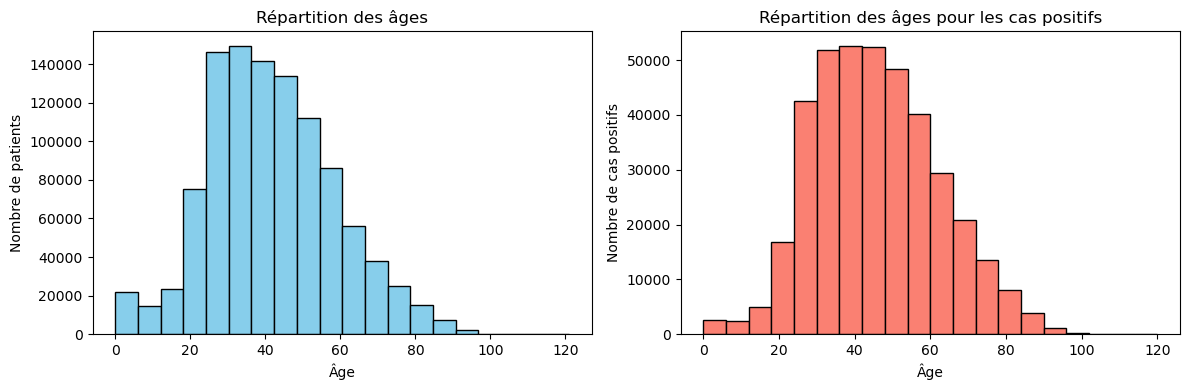

In [63]:
#import matplotlib.pyplot as plt

# Préparer les graphiques côte à côte
fig, axs = plt.subplots(1, 2, figsize=(12, 4))  # 1 ligne, 2 colonnes, la taille des graphes

# Histogramme des âges
covid19_df['AGE'].plot(kind='hist', bins=20, color='skyblue', edgecolor='black', ax=axs[0])
axs[0].set_title("Répartition des âges")  # Titre du premier graphique
axs[0].set_xlabel("Âge")  # Label pour l'axe des abscisses
axs[0].set_ylabel("Nombre de patients")  # Label pour l'axe des ordonnées

# Histogramme des âges pour les cas positifs
cas_positifs = covid19_df.loc[covid19_df['CLASIFFICATION_FINAL'].isin([1, 2, 3])]
cas_positifs['AGE'].plot(kind='hist', bins=20, color='salmon', edgecolor='black', ax=axs[1])
axs[1].set_title("Répartition des âges pour les cas positifs")  # Titre du deuxième graphique
axs[1].set_xlabel("Âge")  # Label pour l'axe des abscisses
axs[1].set_ylabel("Nombre de cas positifs")  # Label pour l'axe des ordonnées

# Afficher les graphiques
plt.tight_layout()  # Ajuste l'espacement interne
plt.show()


### 3 Créez de nouvelles colonnes, fusionnez plusieurs ensembles de données et effectuez des regroupements/agrégations si nécessaire

- 3.1 Création de la variable RESULTAT_TEST

In [65]:
# Codification 1: "Positif"  et 2 : "Négatif"
covid19_df['RESULTAT_TEST'] = covid19_df['CLASIFFICATION_FINAL'].apply(lambda x: 1 if x <= 3 else 2) # 1 "Positif"  et 2 : "Négatif"

# Vérification de la création de la colonne
if 'RESULTAT_TEST' in covid19_df.columns:
    print("La colonne 'RESULTAT_TEST' a bien été créée.")
    
    # 1. Croiser les variables 'RESULTAT_TEST' et 'CLASSIFICATION'
    croisement = pd.crosstab(covid19_df['RESULTAT_TEST'], covid19_df['CLASIFFICATION_FINAL'], margins=True, margins_name="Total")
    print("\nTableau croisé entre 'RESULTAT_TEST' et 'CLASIFFICATION_FINAL' :")
    print(croisement)
    
    # 2. Calcul de la proportion des tests positifs (Résultat 1)
    total_cases = croisement.loc['Total', 'Total']  # Total des cas
    positive_cases = croisement.loc[1, 'Total']  # Total des cas positifs (1)
    
    proportion_positifs = (positive_cases / total_cases) * 100  # Calcul de la proportion en pourcentage
    print(f"\nProportion des cas testés positifs : {proportion_positifs:.2f}%")
else:
    print("La variable 'RESULTAT_TEST' n'a pas été créée.")


La colonne 'RESULTAT_TEST' a bien été créée.

Tableau croisé entre 'RESULTAT_TEST' et 'CLASIFFICATION_FINAL' :
CLASIFFICATION_FINAL     1     2       3     4      5       6       7    Total
RESULTAT_TEST                                                                 
1                     8601  1851  381527     0      0       0       0   391979
2                        0     0       0  3122  26091  128133  499250   656596
Total                 8601  1851  381527  3122  26091  128133  499250  1048575

Proportion des cas testés positifs : 37.38%


- 3.2 Proportion des femmes enceintes testées positives et nécessitant une hospitalisation ou une admission en soins intensifs ?

In [67]:
# Filtrer les femmes enceintes positives
femmes_enceintes_positives = covid19_df.loc[
    (covid19_df['SEX'] == 1) & 
    (covid19_df['PREGNANT'] == 1) & 
    (covid19_df['RESULTAT_TEST'] == 1)
]

# Calculer les proportions
nb_total = femmes_enceintes_positives.shape[0]
nb_hospitalisees = femmes_enceintes_positives[femmes_enceintes_positives['PATIENT_TYPE'] == 1].shape[0]
nb_soins_intensifs = femmes_enceintes_positives[femmes_enceintes_positives['ICU'] == 1].shape[0]

proportion_hospitalisees = (nb_hospitalisees / nb_total) * 100 if nb_total > 0 else 0
proportion_soins_intensifs = (nb_soins_intensifs / nb_total) * 100 if nb_total > 0 else 0

# Afficher les résultats
print(f"Proportion de femmes enceintes positives hospitalisées : {proportion_hospitalisees:.2f}%")
print(f"Proportion de femmes enceintes positives en soins intensifs : {proportion_soins_intensifs:.2f}%")


Proportion de femmes enceintes positives hospitalisées : 74.76%
Proportion de femmes enceintes positives en soins intensifs : 9.62%


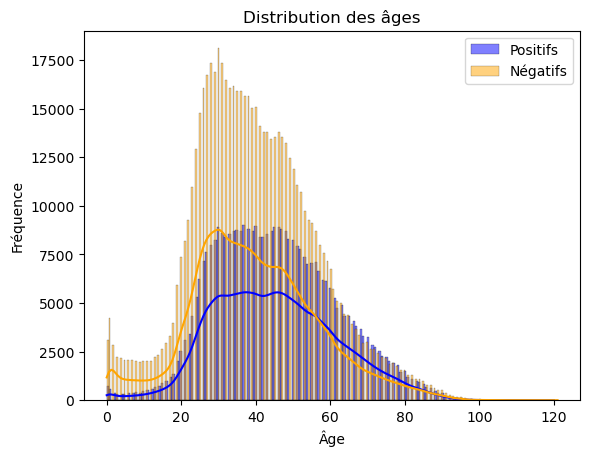

In [69]:
# Séparer les cas positifs et négatifs
cas_positifs = covid19_df.loc[covid19_df['RESULTAT_TEST'] == 1, 'AGE']
cas_negatifs = covid19_df.loc[covid19_df['RESULTAT_TEST'] == 2, 'AGE']

# Tracer les histogrammes
sns.histplot(cas_positifs, kde=True, color='blue', label='Positifs')
sns.histplot(cas_negatifs, kde=True, color='orange', label='Négatifs')
plt.legend()
plt.title("Distribution des âges")
plt.xlabel("Âge")
plt.ylabel("Fréquence")
plt.show()


# Étape 4 : résumez vos déductions et rédigez une conclusion.
1. Rédigez un résumé de ce que vous avez appris de l'analyse.
2. Incluez les idées et les graphiques intéressants des sections précédentes.
3. Partagez des idées de travaux futurs sur le même sujet en utilisant d'autres ensembles de données pertinents.

### 1. Rédigez un résumé de ce que vous avez appris de l'analyse.



- La distribution entre hommes et femmes est presque égale, avec une légère majorité de femmes (50,1 %)
- La majorité des individus sont des survivants (92,7 %), avec seulement 7,3 % de décès.
- les Comorbidités les plus fréquentes sont Hypertension : 15,52 % , Obésité : 15,24 % ,Diabète : 11,92 % . Les autres comorbidités (maladies cardiovasculaires, immunosuppression, maladie rénale chronique) sont moins fréquentes (1-2 %).
- Les femmes (8,9 %) sont légèrement plus souvent admises en soins intensifs que les hommes (7,3 %)
- Les proportions de patients traités en unités médicales spécialisées sont similaires pour les hommes (36,7 %) et les femmes (36,8 %)
- Les femmes (22,6 %) sont plus souvent hospitalisées que les hommes (15,6 %), probablement en raison d’un taux plus élevé de complications ou de comorbidités
- Certaines comorbidités comme le diabète, l’hypertension et l’obésité coexistent fréquemment et augmentent les risques d’hospitalisation ou de gravité. L'admission en soins intensifs semble influencée par une combinaison de facteurs
- Trois quart des femmes enceintes testées positives sont hospitalisé et un dixième sont admises en sois intensif
- La pneumonie (38,13 %) et les maladies rénales chroniques (30,19 %) sont les comorbidités associées aux taux de mortalité les plus élevés.
- Les comorbidités comme le diabète, l'hypertension et les maladies cardiovasculaires augmentent également de façon importante le risque de décès.
- Il y a une différence significative d'âge entre les hospitalisés et les non-hospitalisés
- Il y a une différence significative d'âge entre les cas positifs  et les cas négatifs
- En conclusion, les femmes présentent des proportions légèrement plus élevées que les hommes dans des catégories clés telles que l'admission en soins intensifs, le développement de pneumonie et l'hospitalisation, ce qui pourrait refléter des différences biologiques ou des biais dans les diagnostics et trajets de soins.

### 2. Incluez des graphiques intéressants des sections précédentes.

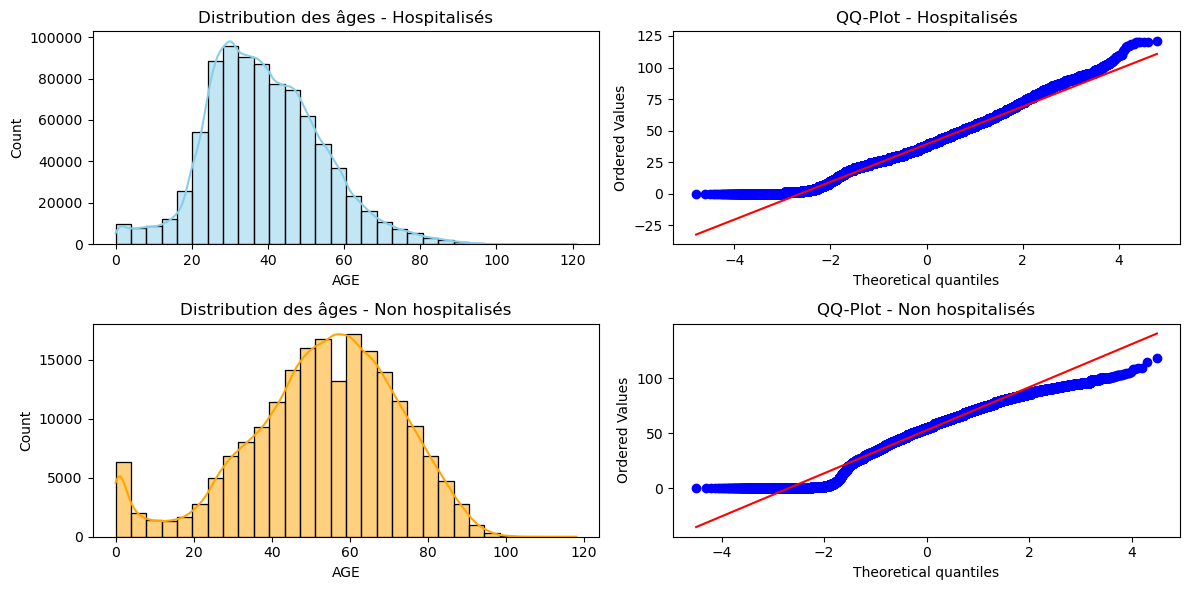

Test de Kolmogorov-Smirnov pour les hospitalisés : p-value = 0.0
Test de Kolmogorov-Smirnov pour les non-hospitalisés : p-value = 0.0
Test de Mann-Whitney : p-value = 0.0
Conclusion : Il y a une différence significative d'âge entre les hospitalisés et les non-hospitalisés.


In [60]:
# 1. Filtrer les patients hospitalisés et non hospitalisés
# On filtre les patients en fonction de la variable 'PATIENT_TYPE' (1 = hospitalisés, 2 = non hospitalisés).
hospitalises = covid19_df[covid19_df['PATIENT_TYPE'] == 1]['AGE']  # Âges des patients hospitalisés
non_hospitalises = covid19_df[covid19_df['PATIENT_TYPE'] == 2]['AGE']  # Âges des patients non hospitalisés
#
# 2. Visualiser la normalité avec des graphiques
# On crée une figure contenant 4 sous-graphiques : 2 pour les hospitalisés et 2 pour les non hospitalisés.
plt.figure(figsize=(12, 6))  # Taille de la figure : largeur = 12, hauteur = 6

# Histogramme des âges pour les hospitalisés
plt.subplot(2, 2, 1)  # Premier sous-graphe (1ère ligne, 1ère colonne)
sns.histplot(hospitalises, kde=True, color='skyblue', bins=30)  # Histogramme avec courbe KDE
plt.title("Distribution des âges - Hospitalisés")  # Titre du graphique

# QQ-Plot pour les hospitalisés
plt.subplot(2, 2, 2)  # Deuxième sous-graphe (1ère ligne, 2ème colonne)
stats.probplot(hospitalises, dist="norm", plot=plt)  # QQ-plot pour vérifier la normalité
plt.title("QQ-Plot - Hospitalisés")  # Titre du graphique

# Histogramme des âges pour les non hospitalisés
plt.subplot(2, 2, 3)  # Troisième sous-graphe (2ème ligne, 1ère colonne)
sns.histplot(non_hospitalises, kde=True, color='orange', bins=30)  # Histogramme avec courbe KDE
plt.title("Distribution des âges - Non hospitalisés")  # Titre du graphique

# QQ-Plot pour les non hospitalisés
plt.subplot(2, 2, 4)  # Quatrième sous-graphe (2ème ligne, 2ème colonne)
stats.probplot(non_hospitalises, dist="norm", plot=plt)  # QQ-plot pour vérifier la normalité
plt.title("QQ-Plot - Non hospitalisés")  # Titre du graphique

# Ajuster les espacements entre les sous-graphiques pour éviter les chevauchements
plt.tight_layout()
# Afficher les graphiques
plt.show()

# 3. Test de Kolmogorov-Smirnov pour vérifier la normalité des données
# On vérifie si les âges des hospitalisés et non hospitalisés suivent une distribution normale.
ks_hosp = stats.kstest(hospitalises, 'norm', args=(hospitalises.mean(), hospitalises.std()))
ks_non_hosp = stats.kstest(non_hospitalises, 'norm', args=(non_hospitalises.mean(), non_hospitalises.std()))

# Afficher les résultats des tests de normalité
print("Test de Kolmogorov-Smirnov pour les hospitalisés : p-value =", ks_hosp.pvalue)
print("Test de Kolmogorov-Smirnov pour les non-hospitalisés : p-value =", ks_non_hosp.pvalue)

# 4. Comparaison des groupes
# Si les deux groupes suivent une distribution normale (p-value > 0.05), on utilise un test t de Student.
if ks_hosp.pvalue > 0.05 and ks_non_hosp.pvalue > 0.05:
    # Test t de Student pour comparer les moyennes
    ttest = stats.ttest_ind(hospitalises, non_hospitalises, equal_var=False)
    print("Test t de Student : p-value =", ttest.pvalue)
    
    # Conclusion basée sur la p-value
    if ttest.pvalue < 0.05:
        print("Conclusion : Il y a une différence significative d'âge entre les hospitalisés et les non-hospitalisés.")
    else:
        print("Conclusion : Aucune différence significative d'âge entre les deux groupes.")
else:
    # Si au moins un groupe ne suit pas une distribution normale, on utilise le test de Mann-Whitney.
    mannwhitney = stats.mannwhitneyu(hospitalises, non_hospitalises, alternative='two-sided')
    print("Test de Mann-Whitney : p-value =", mannwhitney.pvalue)
    
    # Conclusion basée sur la p-value
    if mannwhitney.pvalue < 0.05:
        print("Conclusion : Il y a une différence significative d'âge entre les hospitalisés et les non-hospitalisés.")
    else:
        print("Conclusion : Aucune différence significative d'âge entre les deux groupes.")



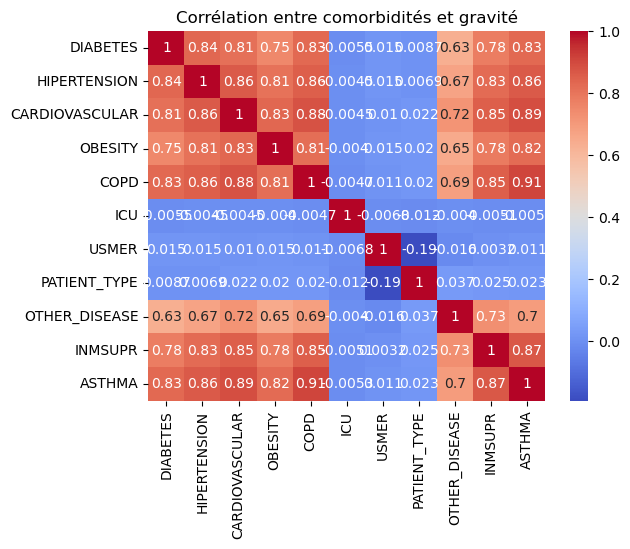

In [63]:
# Heatmap de corrélation
# Liste des variables d'intérêt liées aux comorbidités et à la gravité
variables = ['DIABETES', 'HIPERTENSION', 'CARDIOVASCULAR', 'OBESITY', 'COPD', 'ICU', 'USMER', 'PATIENT_TYPE', 'OTHER_DISEASE', 'INMSUPR','ASTHMA']

# Calcul de la matrice de corrélation
# `corr()` calcule les coefficients de corrélation de Pearson entre toutes les paires de variables sélectionnées.
corr_matrix = covid19_df[variables].corr()

# Visualisation de la matrice de corrélation avec une heatmap
# `heatmap` crée une carte thermique basée sur la matrice de corrélation.
# `annot=True` affiche les valeurs numériques des corrélations sur la heatmap.
# `cmap='coolwarm'` définit une palette de couleurs allant du bleu (corrélations négatives) au rouge (corrélations positives).
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Corrélation entre comorbidités et gravité")  # Titre du graphique
plt.show()  # Affiche la heatmap


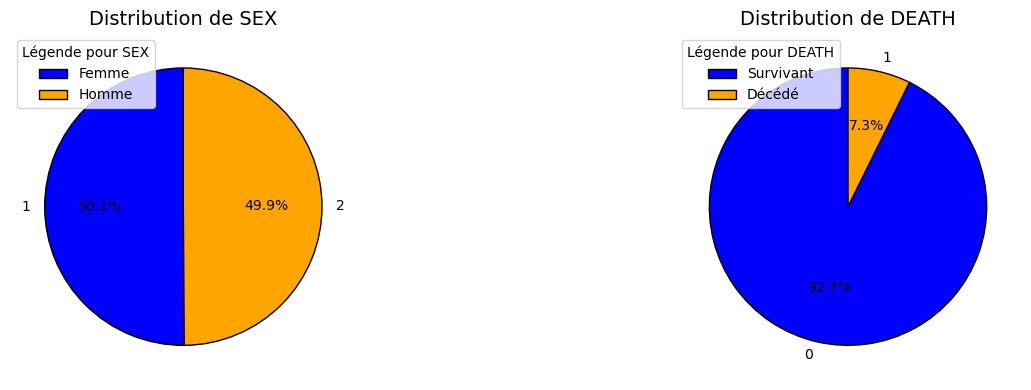

In [65]:
# Définition les couleurs pour les secteurs du graphique
colors = ['blue', 'orange']

# Liste des variables à analyser
variables = ['SEX', 'DEATH']

# Nombre de graphiques par ligne et par colonne
n_cols = 2  # 2 graphiques par ligne
n_rows = 1  # 1 ligne de graphique

# Création de figure avec plusieurs sous-graphiques
fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 4))  # Taille réduite de la figure

# Aplatissement des axes pour faciliter l'indexation
axes = axes.flatten()

# Itération sur les variables pour créer les graphiques circulaires
for i, var in enumerate(variables):
    # Calcul des proportions pour chaque variable
    proportions = covid19_df[var].value_counts(normalize=True) * 100  # Proportions en pourcentage
    proportions = proportions.round(1)  # Arrondi à 1 chiffre après la virgule
    
    # Création le graphique circulaire
    wedges, texts, autotexts = axes[i].pie(
        proportions, 
        labels=proportions.index, 
        autopct='%1.1f%%', 
        colors=colors, 
        startangle=90, 
        wedgeprops={'edgecolor': 'black'}
    )
    
    # Ajout de légende
    axes[i].legend(
        wedges, 
        ['Femme' if var == 'SEX' and idx == 1 else 'Homme' if var == 'SEX' and idx == 2 else 'Survivant' if var == 'DEATH' and idx == 0 else 'Décédé' 
         for idx in proportions.index], 
        title=f"Légende pour {var}", 
        loc='upper left'
    )
    
    # Personnalisation des graphiques
    axes[i].set_title(f"Distribution de {var}", fontsize=14)

# Ajustement de l'espace entre les sous-graphiques
plt.tight_layout()
plt.show()

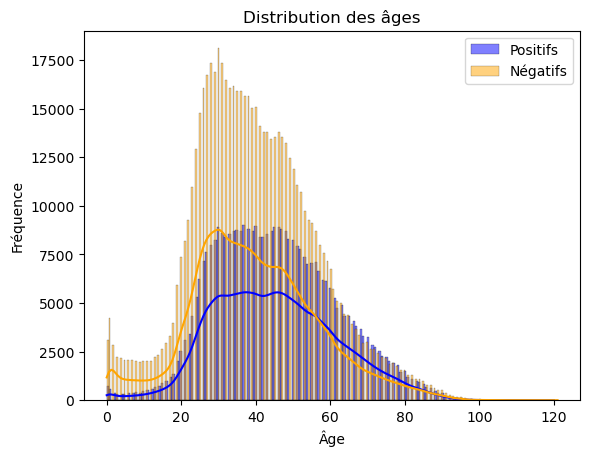

In [67]:
# Séparer les cas positifs et négatifs
cas_positifs = covid19_df.loc[covid19_df['RESULTAT_TEST'] == 1, 'AGE']
cas_negatifs = covid19_df.loc[covid19_df['RESULTAT_TEST'] == 2, 'AGE']

# Tracer les histogrammes
sns.histplot(cas_positifs, kde=True, color='blue', label='Positifs')
sns.histplot(cas_negatifs, kde=True, color='orange', label='Négatifs')
plt.legend()
plt.title("Distribution des âges")
plt.xlabel("Âge")
plt.ylabel("Fréquence")
plt.show()


# Étape 5: Faites des prédictions
1. Divisez le jeux de données (80% entrainement: 20% test)
2. Comparer les résultats de classifications de 3 modèles de machine learning (regression logistique, *random forest*, *Naive Bayes*) suivant les trois critères: *recall*, *accuracy*, *precision*

### Prédisposition des données avant la division 


**Note:** <span style="color: red;"> RESULTAT_TEST </span> est la variable cible (étiquette).

#### Objectif du Projet

L'objectif principal de ce projet est de construire un modèle d'apprentissage automatique qui, compte tenu des symptômes, de l'état et des antécédents médicaux d'un patient atteint du Covid-19, permettra de prédire si le patient est à haut risque ou non.

#### Points clés :
- Prédire le risque COVID-19.
- Utiliser les symptômes et antécédents médicaux.
- Classer les patients en **haut risque** ou **faible risque**.

In [73]:
# Définir les variables non pertinentes pour la du modmodèle 
variables_non_pertinentes = ["MEDICAL_UNIT", "PREGNANT", "USMER", "DEATH","CLASIFFICATION_FINAL","DATE_DIED"]

# Suppression des variables non pertinentes du DataFrame
covid19_data = covid19_df.drop(columns=variables_non_pertinentes, errors='ignore')

# Vérification des premières lignes après suppression
covid19_data.head()


,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,ICU,RESULTAT_TEST
0,1,1,2,1,65.0,2,2,2,2,1,2,2,2,2,2,2,1
1,2,1,2,1,72.0,2,2,2,2,1,2,2,1,1,2,2,2
2,2,2,1,2,55.0,1,2,2,2,2,2,2,2,2,2,2,1
3,1,1,1,2,53.0,2,2,2,2,2,2,2,2,2,2,1,2
4,2,1,2,2,68.0,1,2,2,2,1,2,2,2,2,2,2,1


### 1. Divisez le jeux de données (80% entrainement: 20% test)

In [75]:
# Copie de la base et définition de la variable d'étiquette 
covid19_final = covid19_data.copy()
target = "RESULTAT_TEST"

In [77]:
# formulate X and y
X = covid19_final.drop("RESULTAT_TEST", axis=1)
y = covid19_final[target]

In [79]:
# Diviser les données en ensembles d'entraînement (80%) et de test (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Afficher les dimensions des ensembles
print(f"Taille de X_train : {X_train.shape}")
print(f"Taille de X_test : {X_test.shape}")
print(f"Taille de y_train : {y_train.shape}")
print(f"Taille de y_test : {y_test.shape}")

Taille de X_train : (838860, 16)
Taille de X_test : (209715, 16)
Taille de y_train : (838860,)
Taille de y_test : (209715,)


### 2. Comparer les résultats de classifications de 3 modèles de machine learning (regression logistique, random forest, Naive Bayes) suivant les trois critères: recall, accuracy, precision

#### Points importants :
- Nous avons 1 million 50 mille observations et 16 variables dans le modèle 
- Donc après avoir exécuté le code soyez patient pour les résultats 

In [81]:
# Initialisation des modèles avec gestion du déséquilibre pour Logistic Regression et Random Forest
models = {
    "Logistic Regression": LogisticRegression(solver='saga', max_iter=1000, random_state=42, class_weight="balanced"),
    "Random Forest": RandomForestClassifier(n_estimators=200, max_depth=5, random_state=42, class_weight="balanced"),
    "Naive Bayes": GaussianNB()  # Naive Bayes ne supporte pas directement class_weight
}

# Dictionnaire pour stocker les résultats (moyenne et écart-type pour chaque métrique)
results_summary = {}

# Définition des métriques comme scorers personnalisés
scorers = {
    "Accuracy": make_scorer(accuracy_score),
    "Recall": make_scorer(recall_score, average='binary'),
    "Precision": make_scorer(precision_score, average='binary')
}

# Validation croisée pour chaque modèle
for model_name, model in models.items():
    metric_scores = {}
    for metric_name, scorer in scorers.items():
        # Effectuer une validation croisée sur 10 splits
        scores = cross_val_score(model, X, y, cv=10, scoring=scorer)
        # Calculer la moyenne et l'écart-type
        metric_scores[f"{metric_name}_mean"] = round(np.mean(scores), 2)
        metric_scores[f"{metric_name}_std"] = round(np.std(scores), 2)
    # Stocker les résultats pour le modèle
    results_summary[model_name] = metric_scores

# Convertir les résultats en DataFrame
results_df = pd.DataFrame(results_summary).T

# Afficher les résultats
print("Résultats des modèles (validation croisée - moyenne et écart-type) :")
print(results_df)

# Identifier le meilleur modèle en fonction de la moyenne des métriques
best_model = results_df.filter(like="_mean").mean(axis=1).idxmax()
best_model_std = results_df.filter(like="_std").loc[best_model].mean()  # Moyenne des écarts-types pour ce modèle

# Afficher le meilleur modèle
print(f"\nLe meilleur modèle est : {best_model}")
print(f"Écart-type moyen pour le meilleur modèle : {best_model_std:.2f}")


Résultats des modèles (validation croisée - moyenne et écart-type) :
                     Accuracy_mean  Accuracy_std  Recall_mean  Recall_std  \
Logistic Regression           0.62          0.04         0.42        0.19   
Random Forest                 0.64          0.04         0.38        0.20   
Naive Bayes                   0.66          0.05         0.24        0.18   

                     Precision_mean  Precision_std  
Logistic Regression            0.49           0.05  
Random Forest                  0.53           0.05  
Naive Bayes                    0.58           0.08  

Le meilleur modèle est : Random Forest
Écart-type moyen pour le meilleur modèle : 0.10


### - Le meilleur modèle retenu

In [113]:
#classifier.fit(X,y)
models["Random Forest"].fit(X,y) 

RandomForestClassifier(class_weight='balanced', max_depth=5, n_estimators=200,
                       random_state=42)

# Etape 6: Developper et  deployer l'application de Machine learning de detection de cas covid avec Streamlit

### Sauvegarder le <span style='color: green;'>Modèle</span>

In [123]:
with open("covid19_clf.pkl", "wb") as file:
    pickle.dump(models["Random Forest"], file)


### Developpement et  déploiement de l'application sur streamlit


#### Points clés :
- Installez Streamlit si ce n'est pas déjà fait, avec **pip install streamlit**
- Exécutez ceci **streamlit run Projet_Python.py** dans le terminal python.

# <span style="color:red">DATE LIMITE DE SOUMISSION DU PROJET: /02/2024  à    23H59 GMT </span>     

### <span style="color:red"> Adresse: amanvon.atta@inphb.ci</span>